In [ ]:
from ollama_help import check_ollama, check_models
from utils import load_json

if not check_ollama():
    print("Ollama não está instalado ou não está conectado.")
    exit()

questoes = load_json("./questoes/questoes.json")


Ollama não está instalado ou não está conectado.


: 

In [2]:
# Questões de Texto

text_models = ["phi4", "llava", "deepseek-r1", "llama3.2", "gemma2", "mistral"]
avaliable_text_models = list(check_models(text_models))

text_questions   = list(filter(lambda x : x["type"] == "only-text", questoes))

print(f"Total de {len(text_questions)} questões apenas texto")

✅ phi4 disponível
✅ llava disponível
✅ deepseek-r1 disponível
✅ llama3.2 disponível
✅ gemma2 disponível
✅ mistral disponível
Total de 1608 questões apenas texto


,Model,Finish,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,deepseek-r1,1609,883,127,599,0.548788,32784.816463,-20.375896,20.375896,469.823419,2.529047
1,llama3.2,1609,426,28,1155,0.264761,533.942759,-0.331848,0.331848,41.733469,0.086080
2,llava,1609,730,77,802,0.453698,922.123624,-0.573104,0.573104,12.115683,0.151764
3,mistral,1609,931,30,648,0.578620,1478.200308,-0.918707,0.918707,20.847775,0.169479
4,phi4,1609,1337,12,260,0.830951,10446.196960,-6.492354,6.492354,106.759996,0.320840
5,gemma2,1609,1208,30,371,0.750777,999.917122,-0.621453,0.621453,11.382335,0.271672
6,TOTAL,9654,5515,304,3835,0.571266,-29.313361,24.430837,-0.003036,469.823419,0.086080


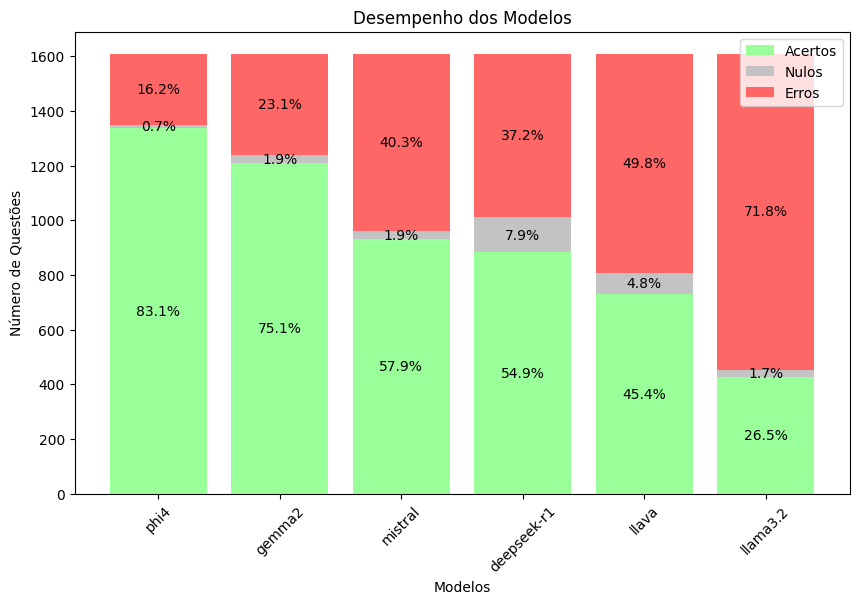

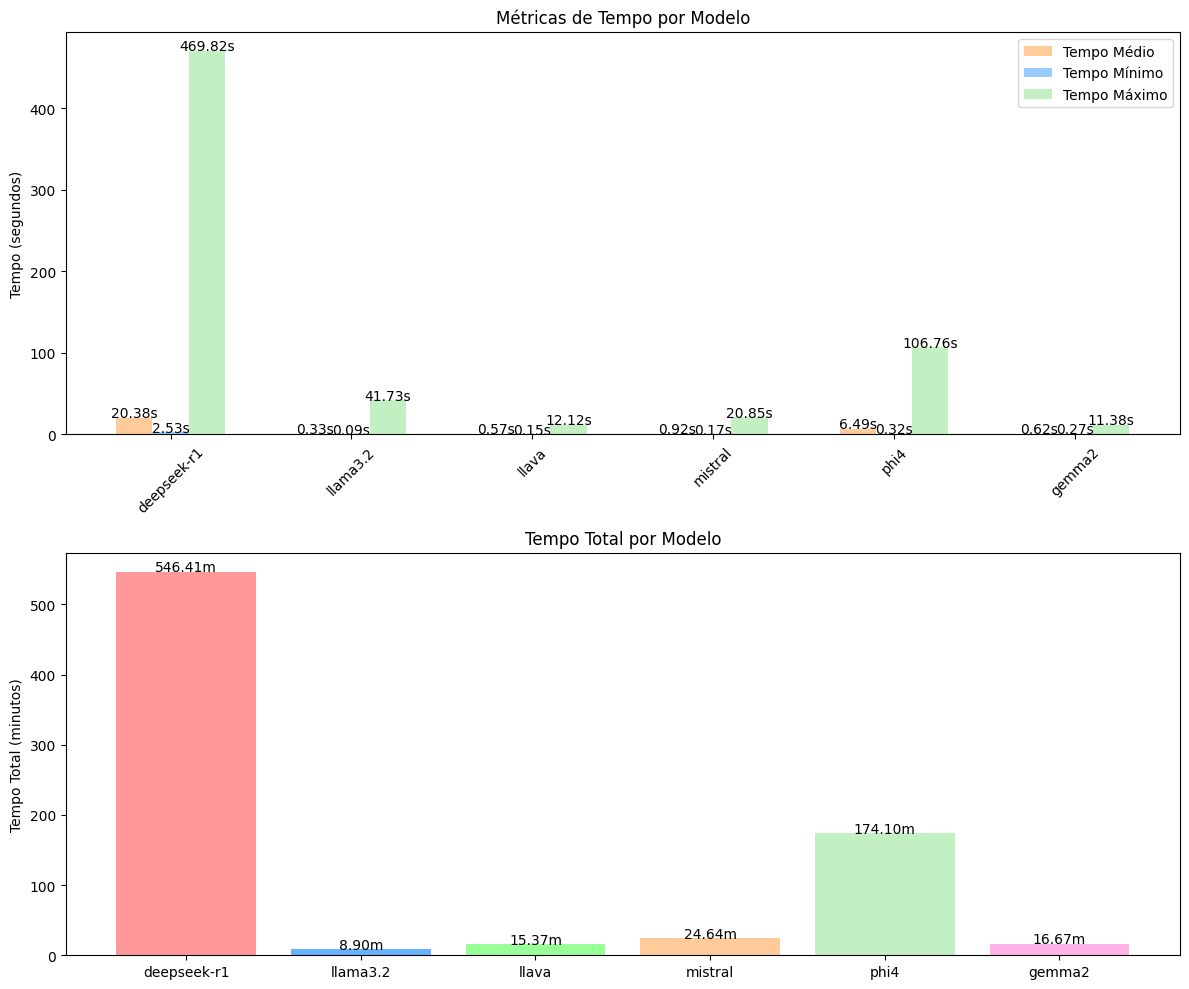

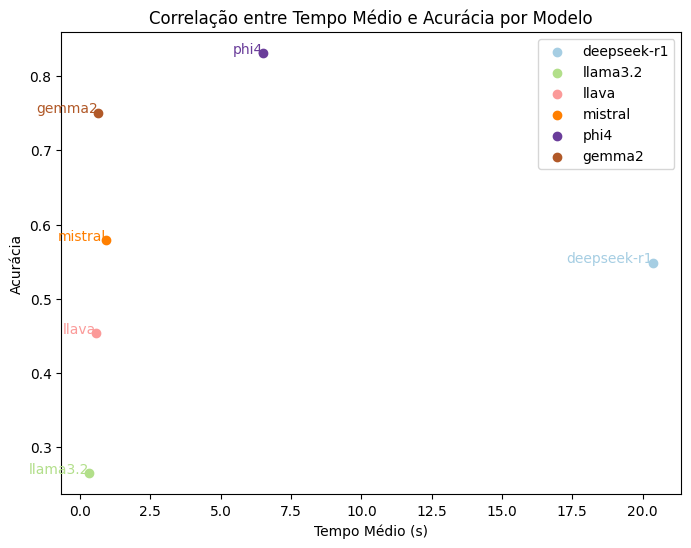

In [4]:
# Teste das Questões no Ollama

from ollama_help.runner import test_ollama_models
from utils import test_table, plots
from IPython.display import display

test_ollama_models(
    models = sorted(avaliable_text_models, key=lambda x : len(x)),
    questions = text_questions,
    predict_file ="./predict_data/text_predictions.json",
)

text_table = test_table("./predict_data/text_predictions.json", len(text_questions))
display(text_table)

plots.model_performance(text_table)
plots.time_metrics(text_table)
plots.accuracy_vs_time(text_table)

In [5]:
import random

new_models = ["qwen2-math:1.5b", "qwen2-math:7b", "phi3.5", "mistral-small", "mathstral"]
new_models_avaliable = list(check_models(new_models))

random.seed(42)

example_context_questions = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", text_questions)), 25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", text_questions)),25))
)



✅ qwen2-math:1.5b disponível
✅ qwen2-math:7b disponível
✅ phi3.5 disponível
✅ mistral-small disponível
✅ mathstral disponível


,Model,Finish,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,phi3.5,100 (20%),16,83,1,0.160,13:23,0.00,8.04,02:07,0.29
1,mathstral,100 (20%),56,9,35,0.560,10:38,0.00,6.39,23.44,0.25
2,qwen2-math:7b,100 (20%),37,0,63,0.370,40.43,0.00,0.40,4.43,0.16
3,mistral-small,100 (20%),78,4,18,0.780,44:21,0.00,26.61,04:11,1.02
4,qwen2-math:1.5b,100 (20%),26,3,71,0.260,04:35,0.00,2.76,6.40,0.21
5,TOTAL,500 (100%),213,99,188,0.426,0.00,-0.00,0.00,04:11,0.16


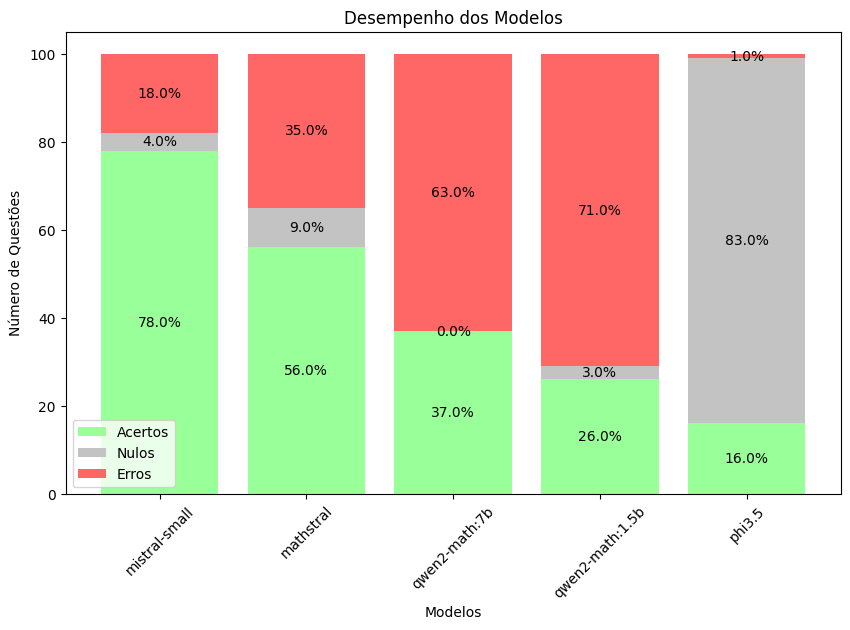

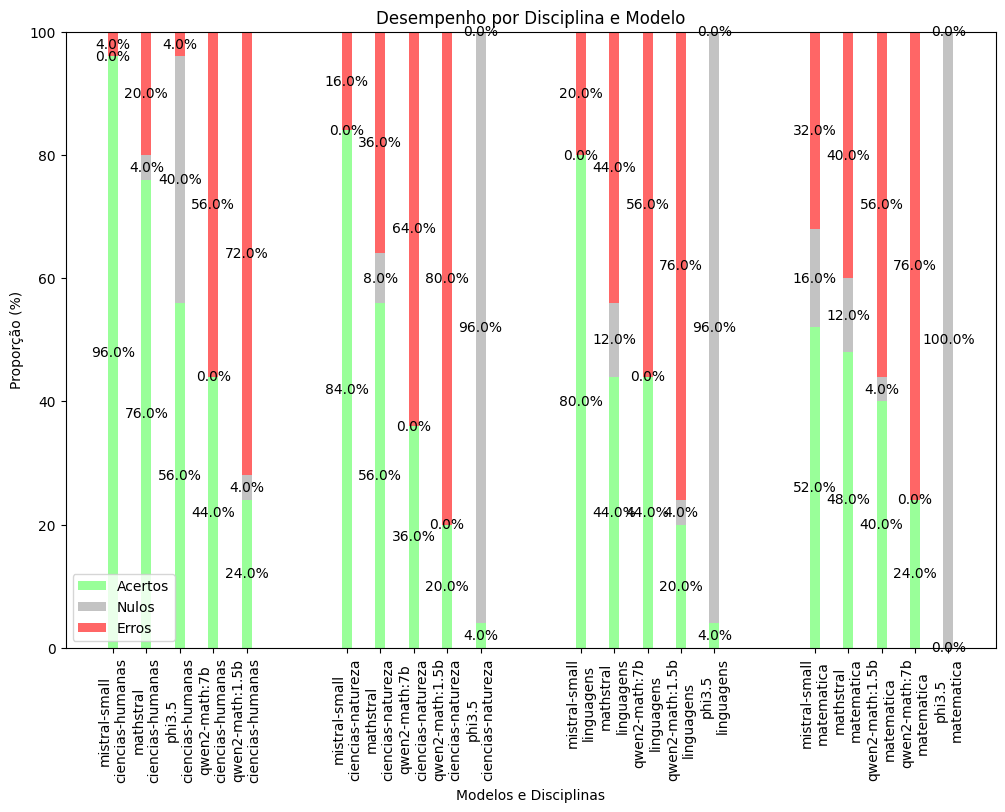

,Model,Finish,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,phi3.5,100,16,83,1,0.160,803.697748,0.0,8.036977,127.324694,0.285188
1,qwen2-math:7b,100,37,0,63,0.370,40.428395,0.0,0.404284,4.432784,0.156412
2,qwen2-math:1.5b,100,26,3,71,0.260,275.699232,0.0,2.756992,6.401523,0.205145
3,mistral-small,100,78,4,18,0.780,2661.268912,0.0,26.612689,251.289925,1.019627
4,mathstral,100,56,9,35,0.560,638.638765,0.0,6.386388,23.443004,0.253637
5,TOTAL,500,213,99,188,0.426,0.000000,-0.0,0.000000,251.289925,0.156412


In [6]:
test_ollama_models(
    models = sorted(new_models_avaliable, key=lambda x : len(x)),
    questions = example_context_questions,
    predict_file ="./predict_data/new_text_predictions.json",
)

test_table("./predict_data/new_text_predictions.json", len(example_context_questions))

In [6]:
qwen_models = ["qwen2.5:14b", "qwen2.5:7b", "qwen2.5:1.5b"]

qwen_models_avaliable = list(check_models(qwen_models))

test_ollama_models(
    models = qwen_models,
    questions = example_context_questions,
    predict_file ="./predict_data/qwen_context_predictions.json",
)

test_table("./predict_data/qwen_context_predictions.json", len(example_context_questions))


,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,qwen2.5:14b,100 (100%),64,2,34,64%,01:12,0.00,0.72,4.78,0.30
1,qwen2.5:7b,100 (100%),64,0,36,64%,33.26,0.00,0.33,4.68,0.15
2,qwen2.5:1.5b,100 (100%),42,0,58,42%,15.78,0.00,0.16,2.12,0.07
3,TOTAL,300 (100%),170,2,128,57%,02:01,ND,0.40,4.78,0.07


,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,qwen2.5:14b,100 (100%),64,2,34,64%,01:12,0.00,0.72,4.78,0.30
1,qwen2.5:7b,100 (100%),64,0,36,64%,33.26,0.00,0.33,4.68,0.15
2,qwen2.5:1.5b,100 (100%),42,0,58,42%,15.78,0.00,0.16,2.12,0.07
3,TOTAL,300 (100%),170,2,128,57%,02:01,ND,0.40,4.78,0.07


In [7]:
reasoning_models = ["openthinker", "mistral-nemo", "smallthinker", "deepscaler"]
avaliabel_reasoning_models = list(check_models(reasoning_models))

✅ openthinker disponível
✅ mistral-nemo disponível
✅ smallthinker disponível
✅ deepscaler disponível


,Model,Finish,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,openthinker,34 (100%),22,3,9,0.647059,16:00,31:05,28.26,01:30,10.47
1,mistral-nemo,0 (0%),0,0,0,0.000000,0.00,0.00,0.00,0.00,ND
2,smallthinker,0 (0%),0,0,0,0.000000,0.00,0.00,0.00,0.00,ND
3,deepscaler,0 (0%),0,0,0,0.000000,0.00,0.00,0.00,0.00,ND
4,TOTAL,34 (100%),22,3,9,0.647059,31:05,01:00:20,54.86,01:30,10.47


Error ao gerar resposta para a pergunta 2011057 do modelo openthinker: division by zero


KeyboardInterrupt: 

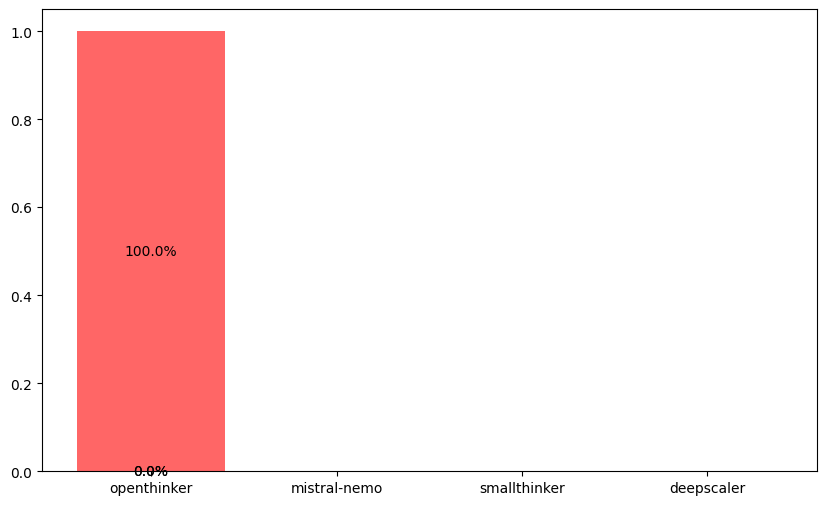

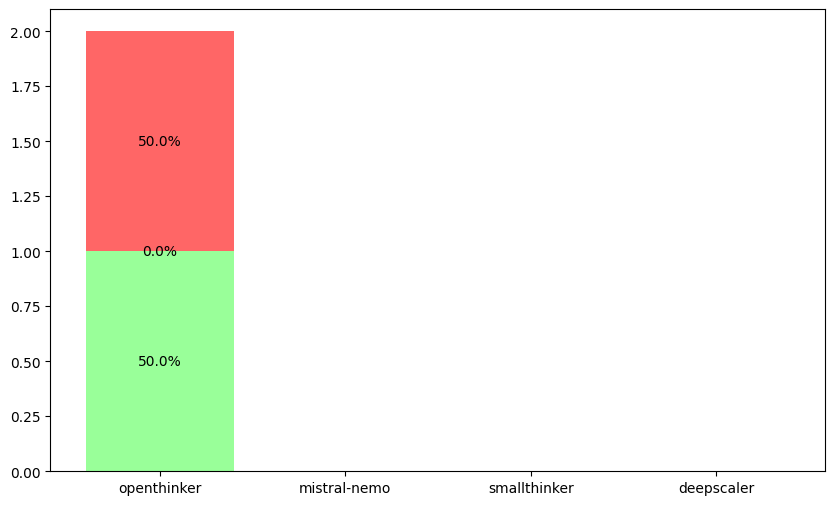

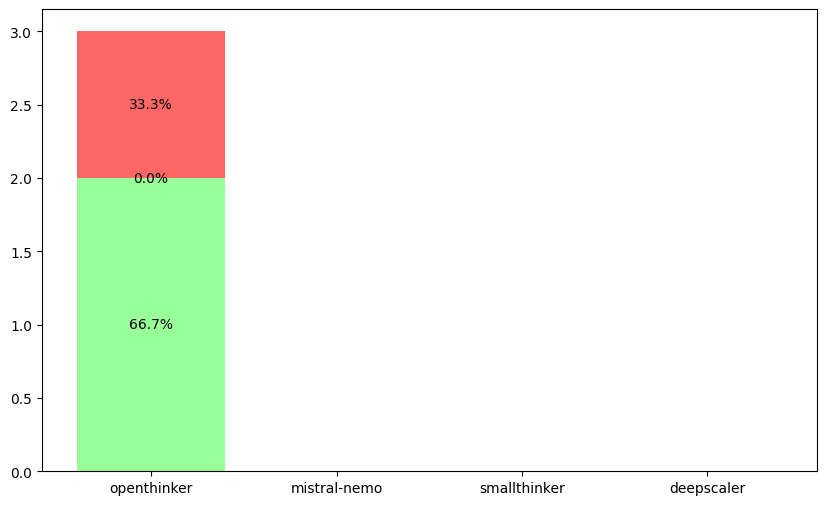

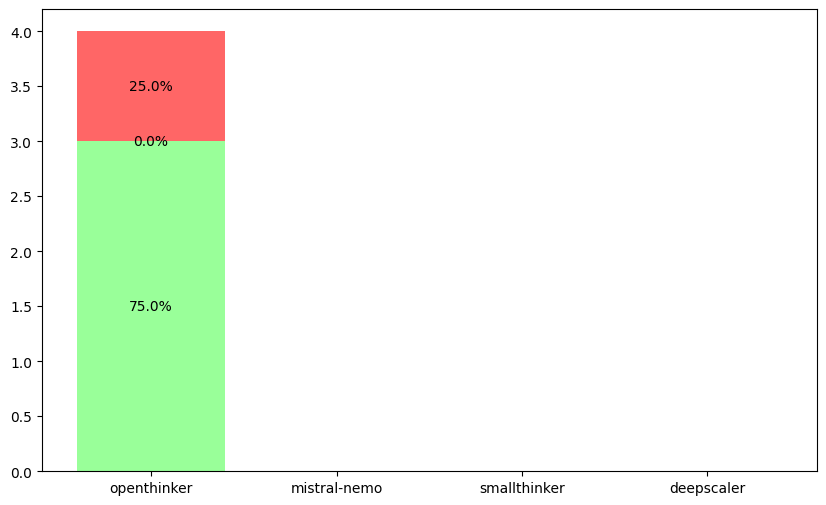

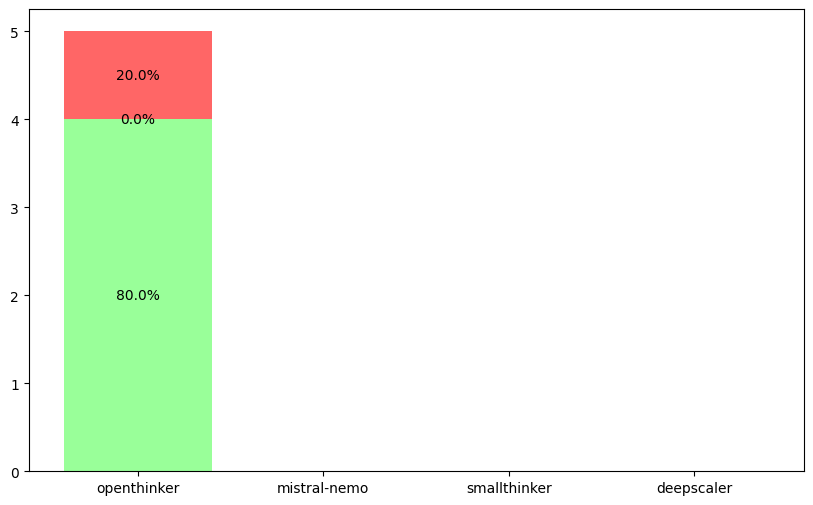

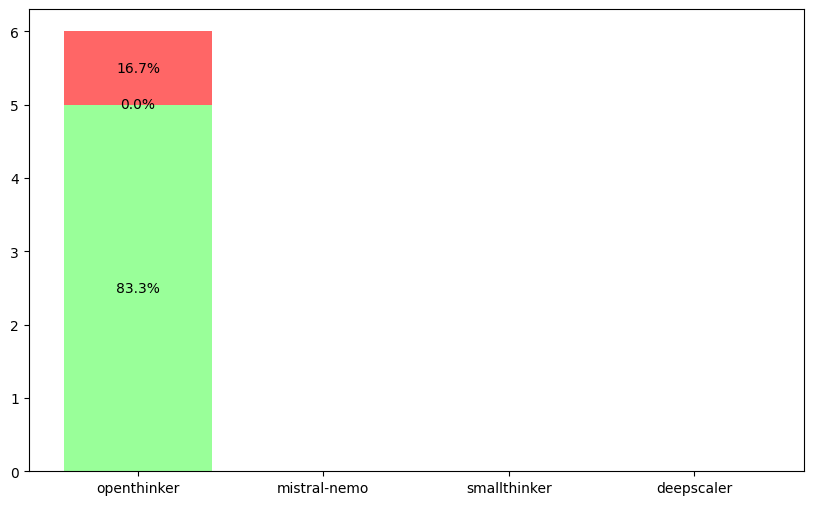

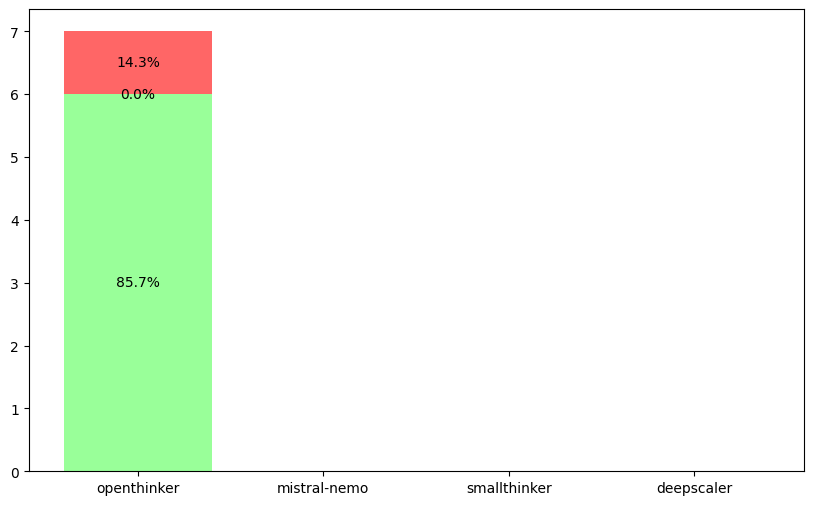

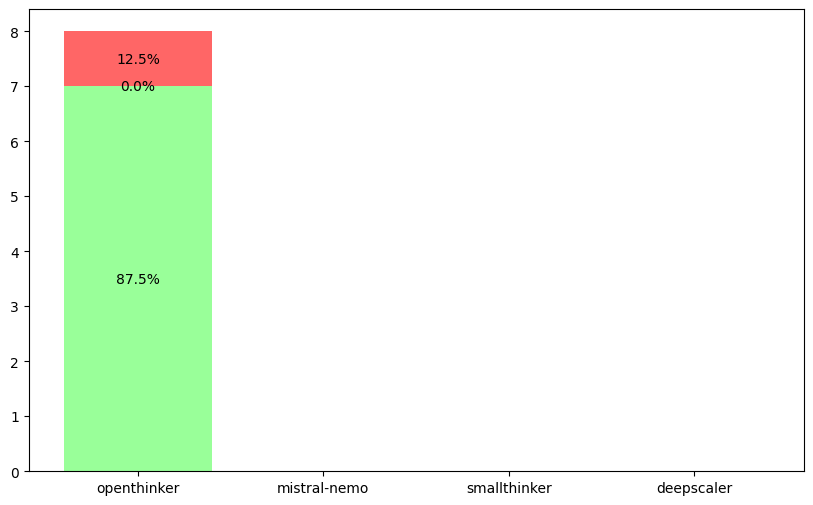

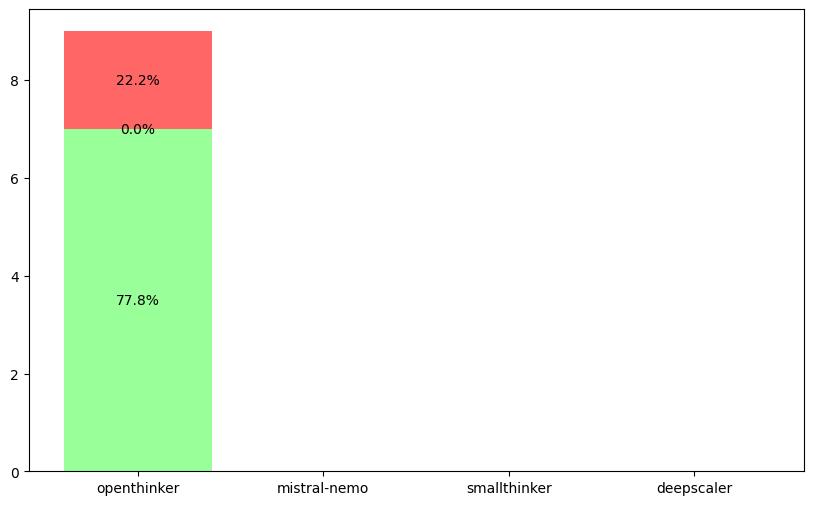

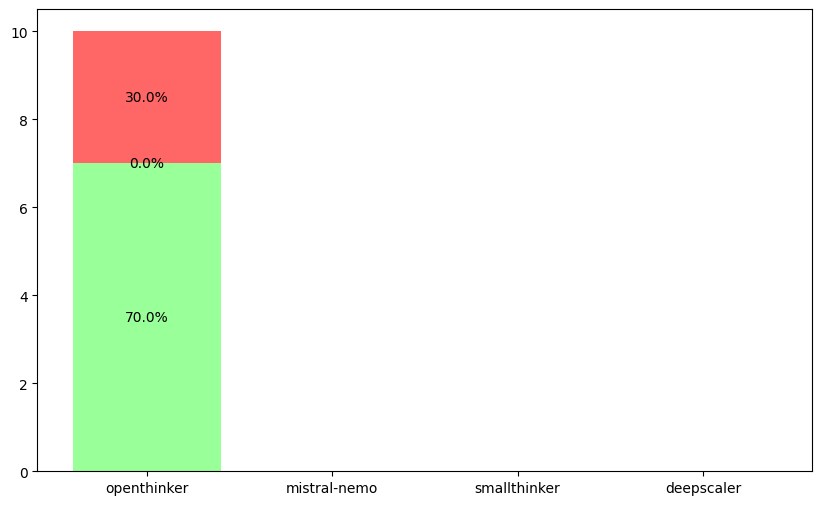

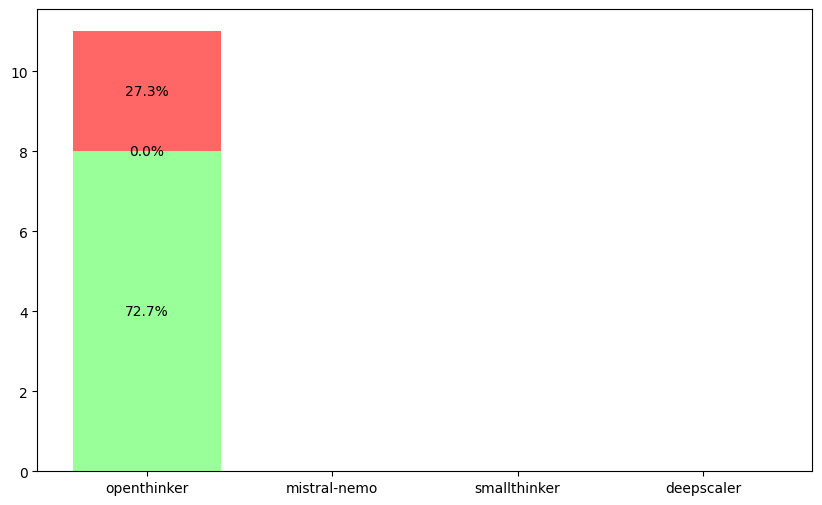

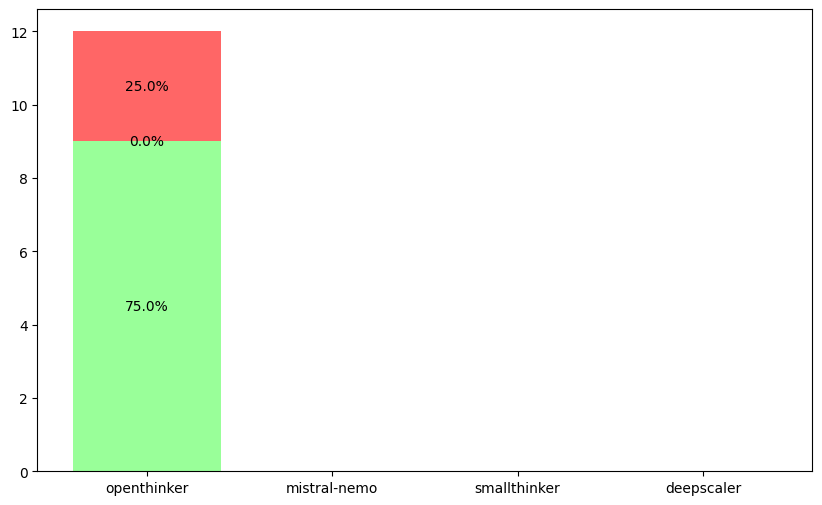

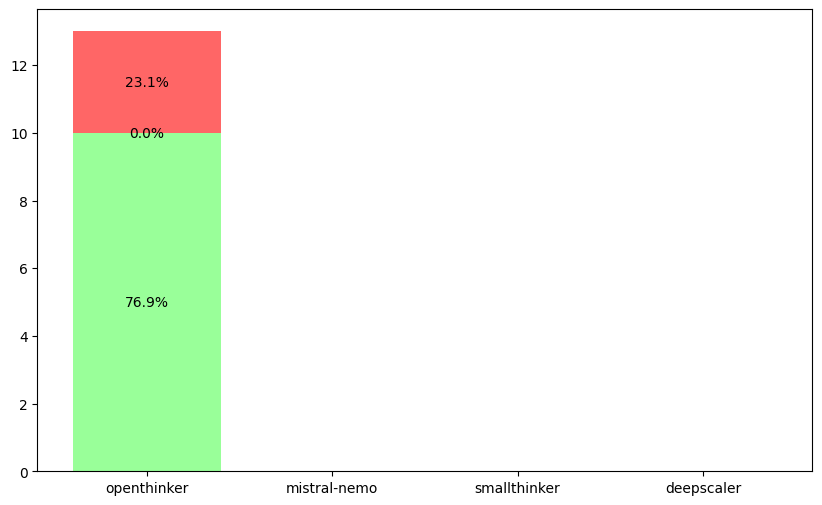

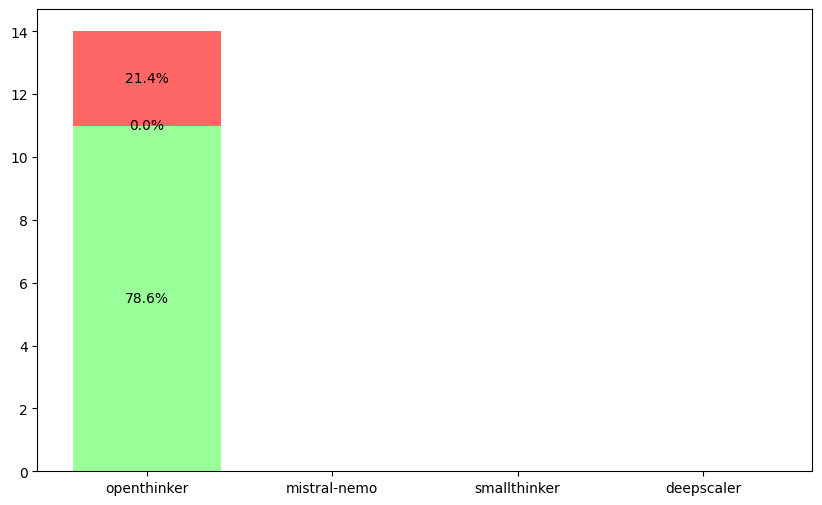

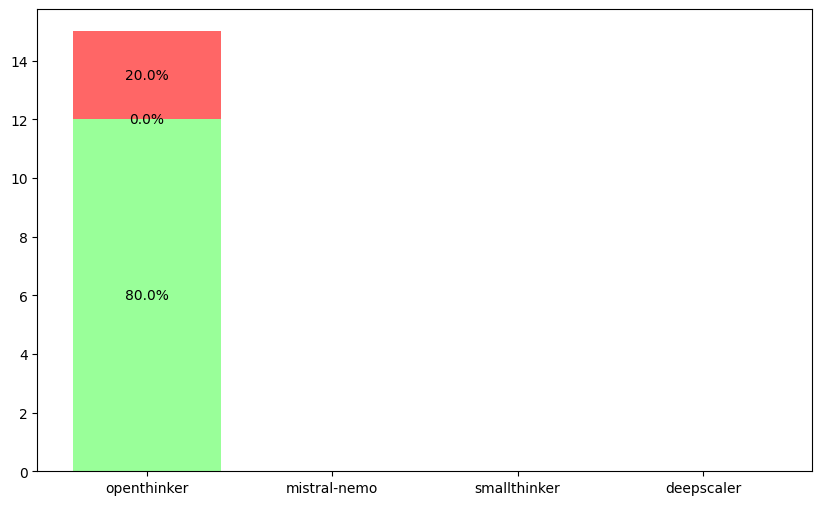

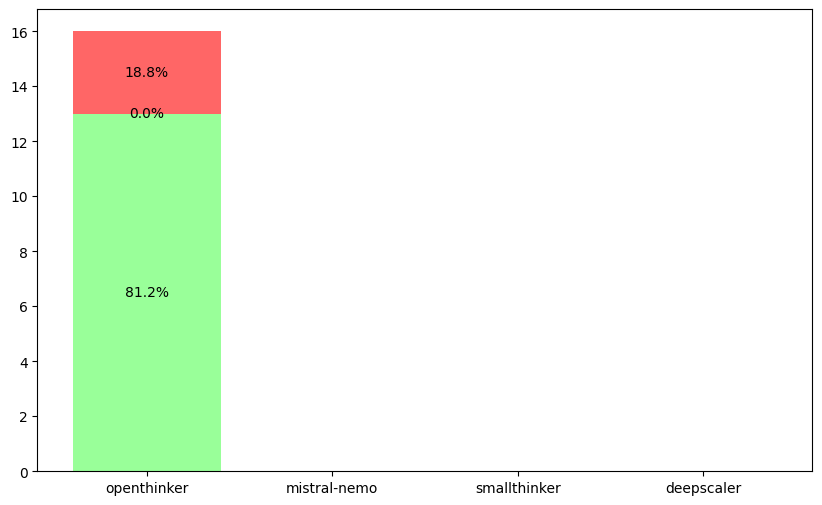

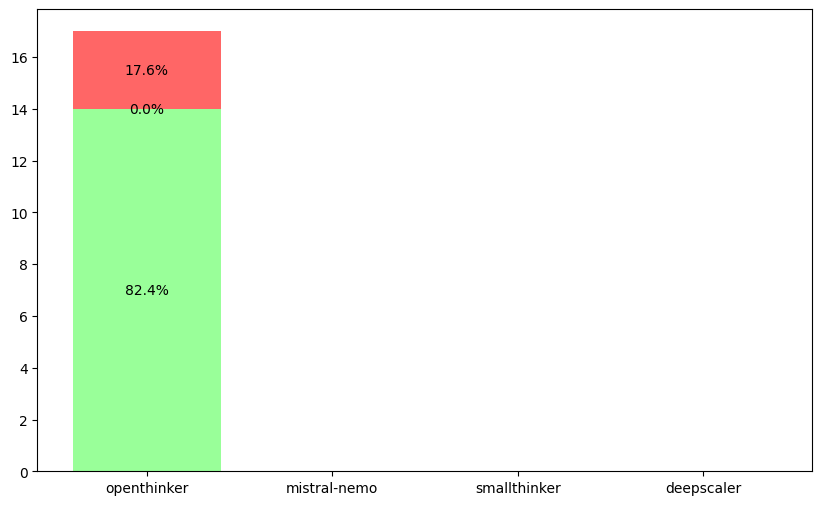

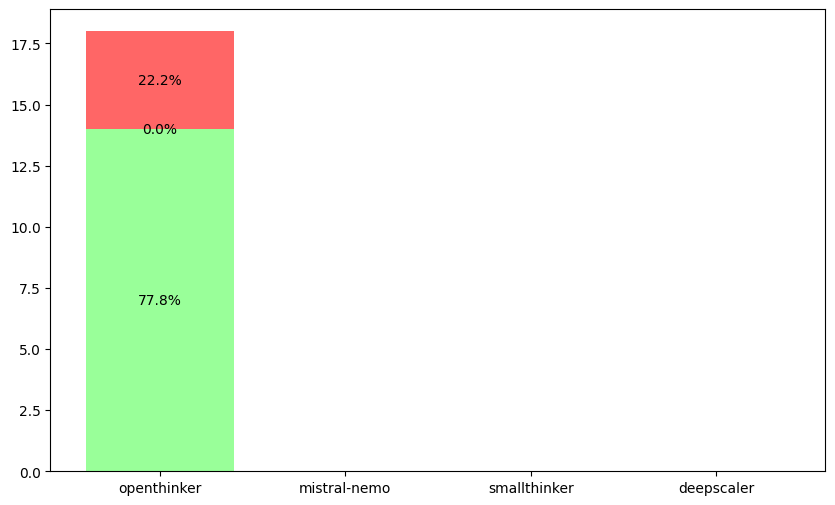

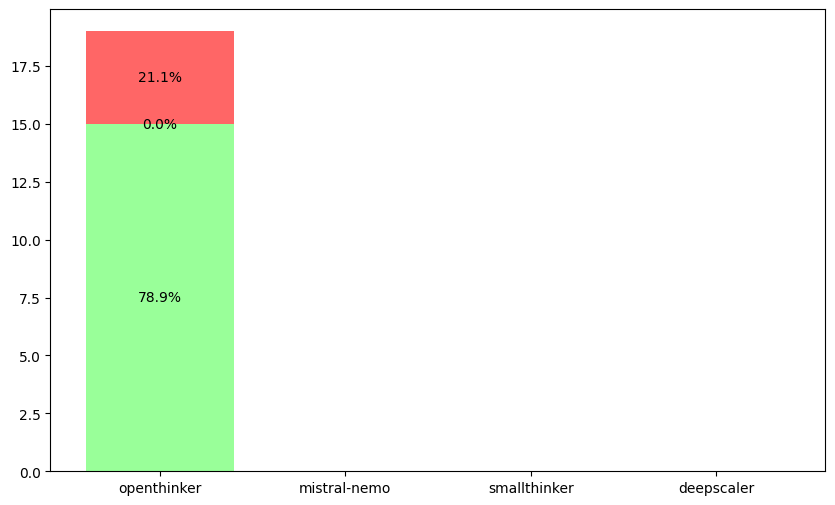

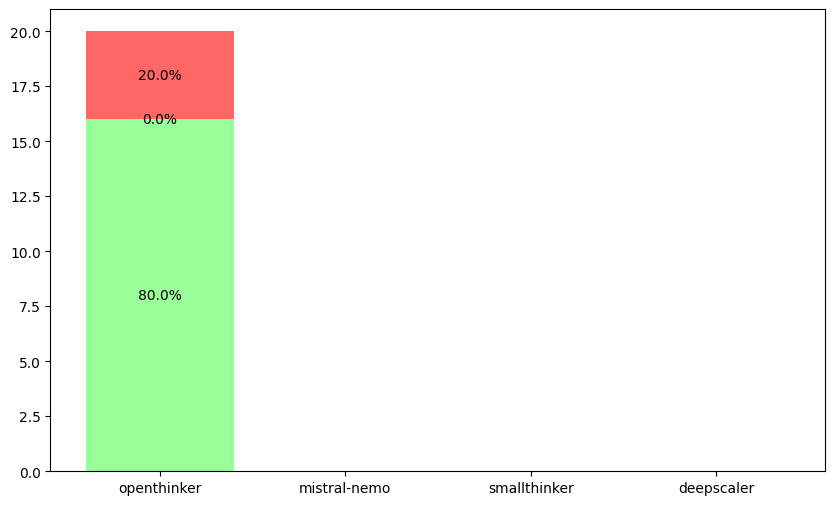

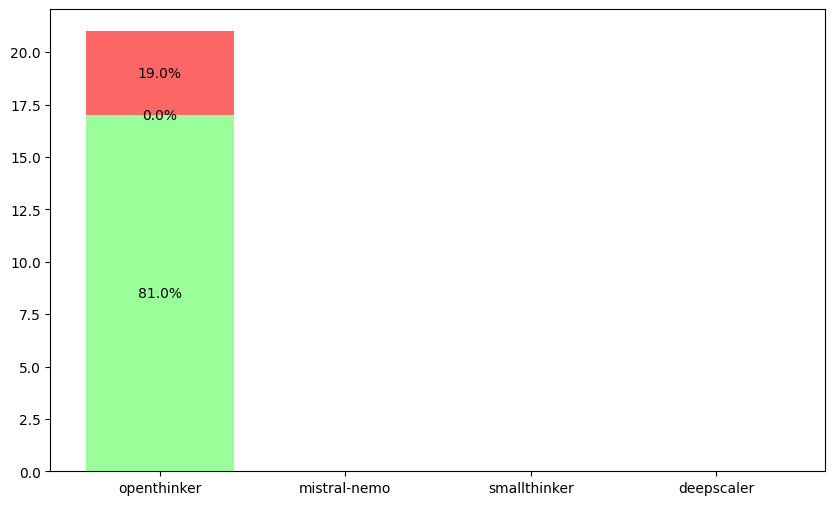

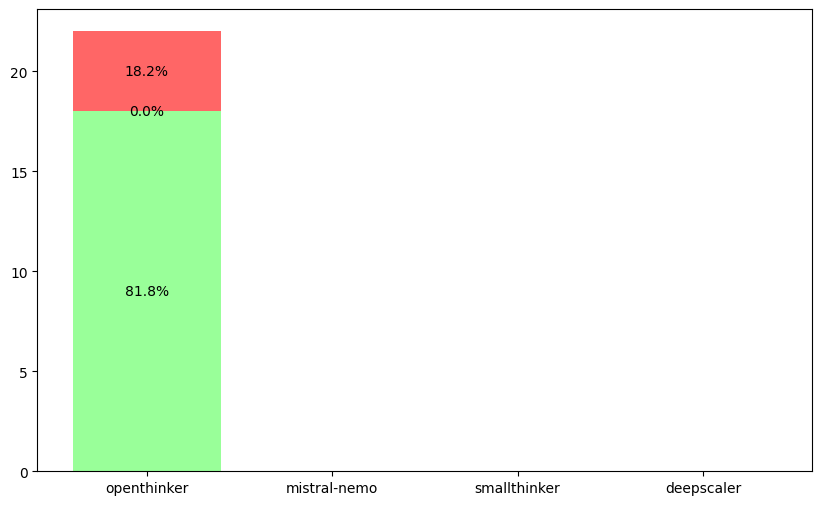

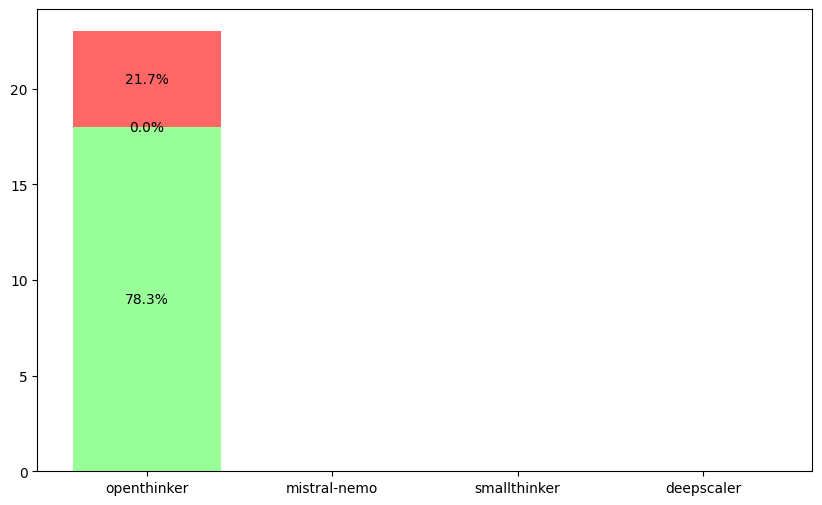

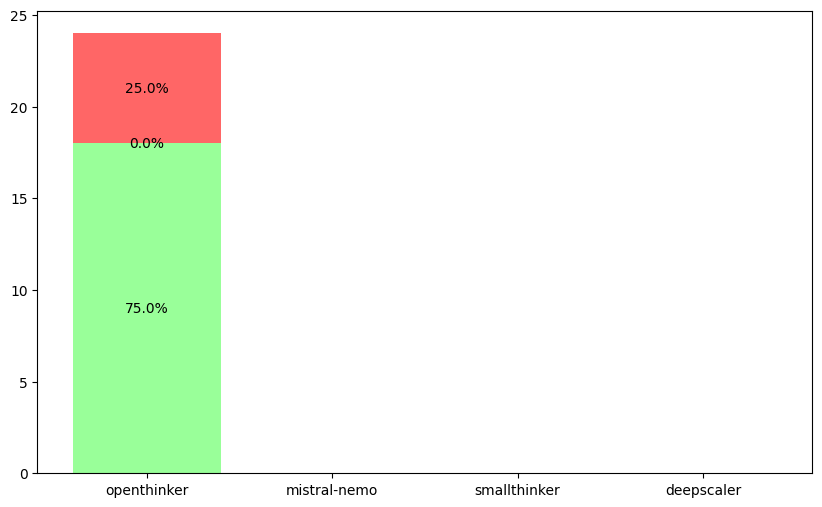

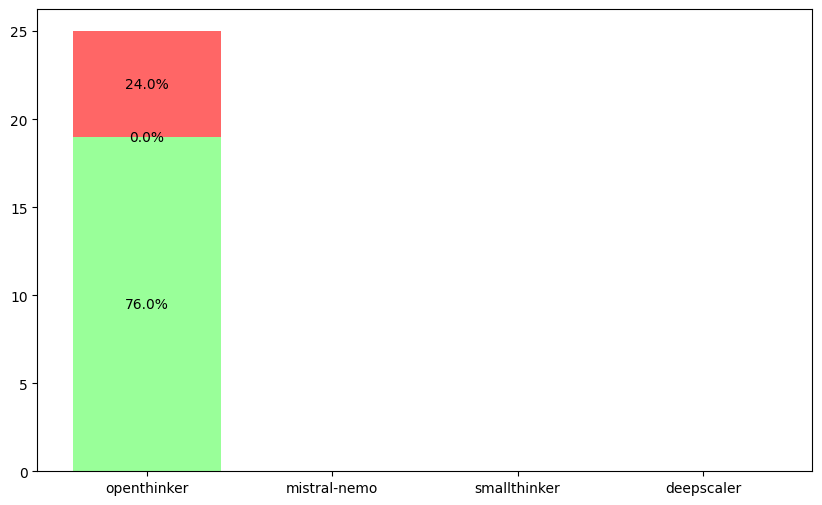

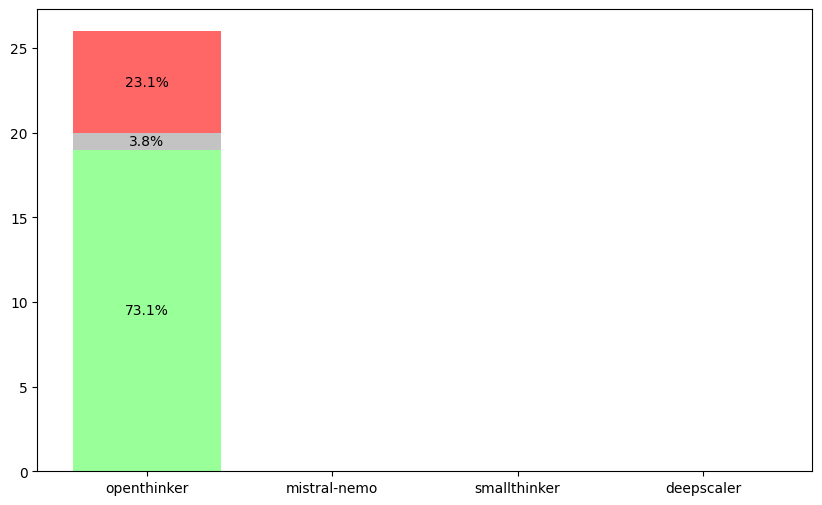

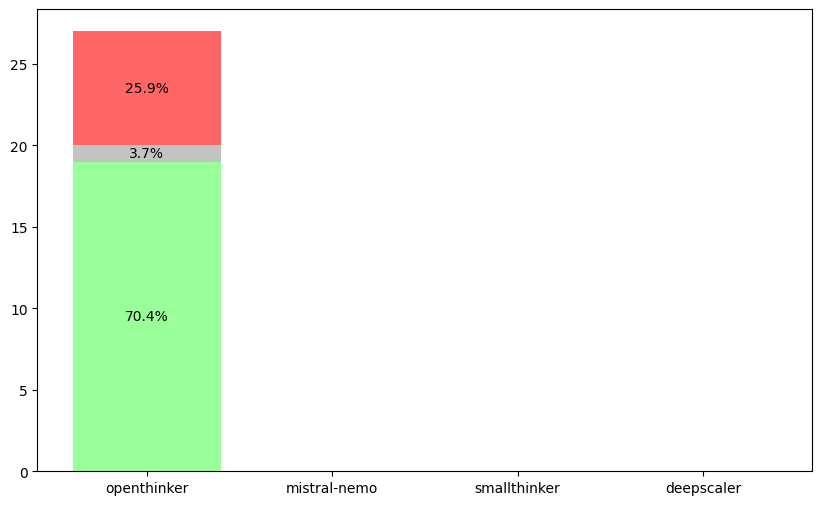

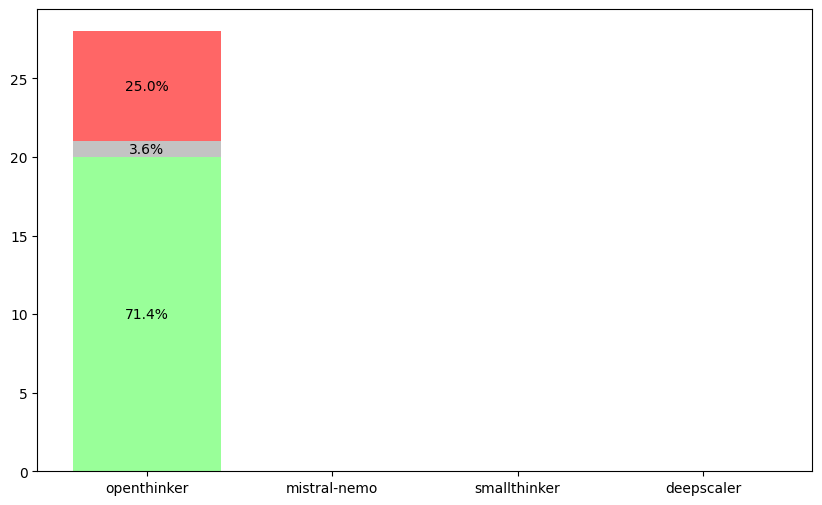

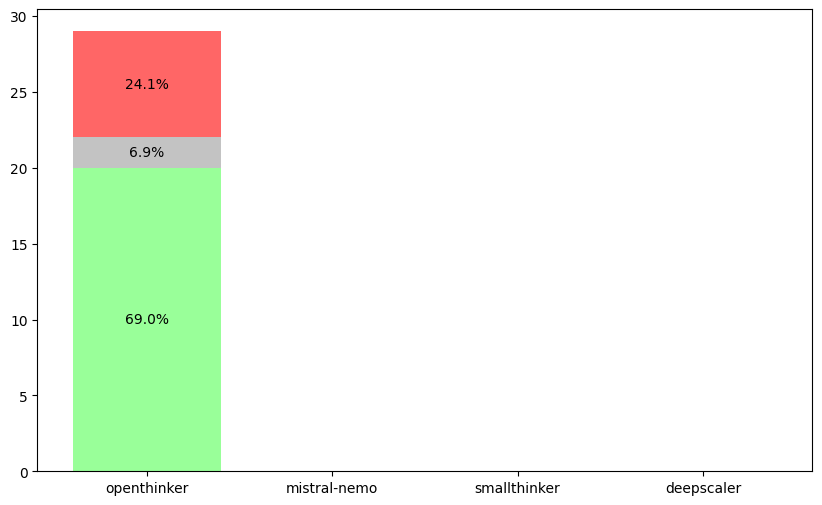

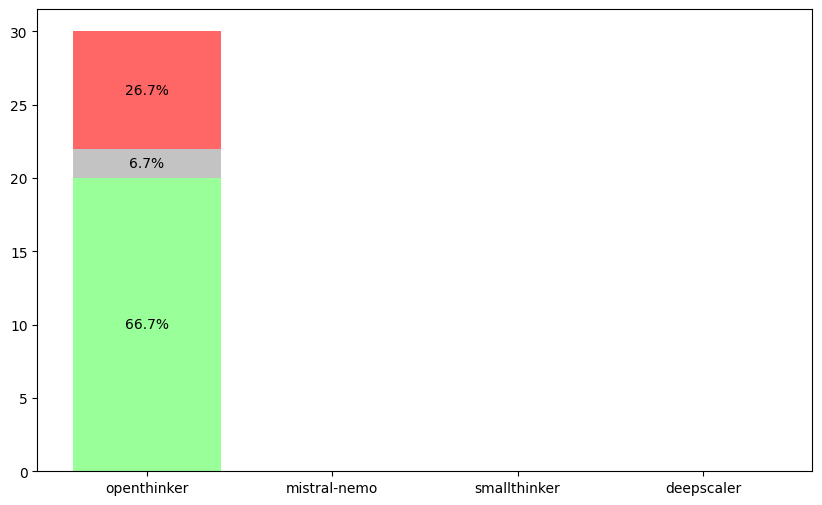

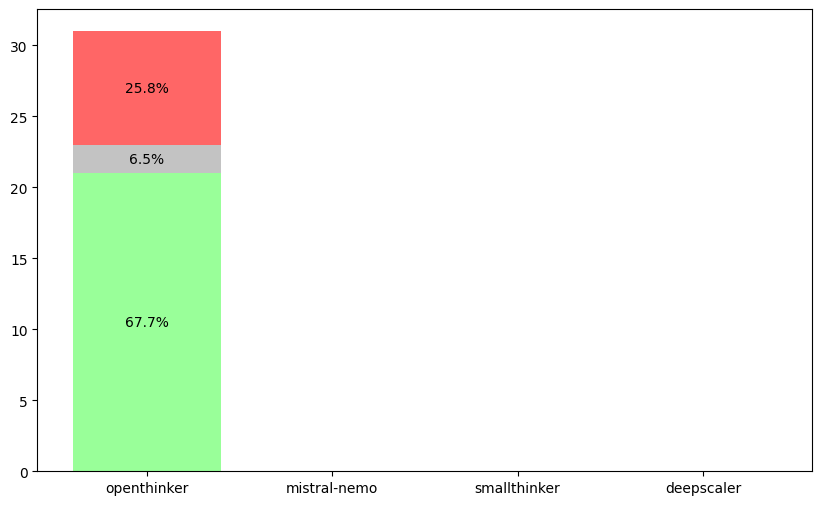

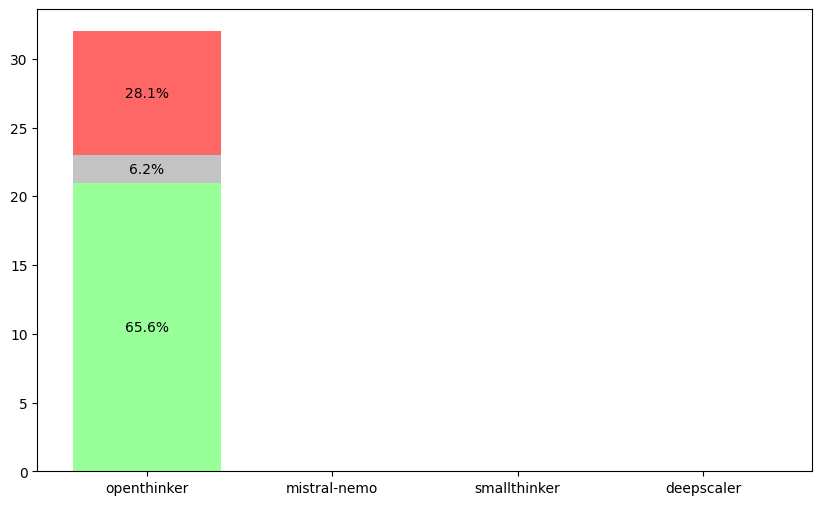

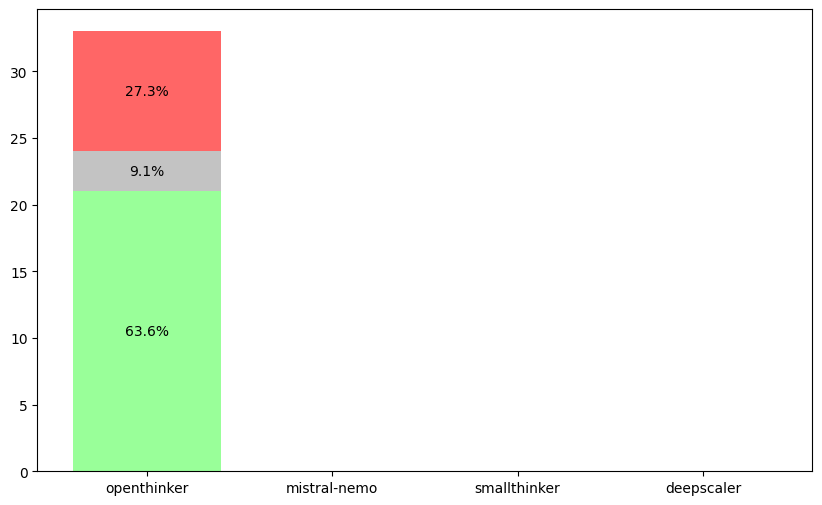

: 

In [8]:
test_ollama_models(
    models=avaliabel_reasoning_models,
    questions = example_context_questions,
    predict_file ="./predict_data/reasoning_predictions.json",
)

test_table("./predict_data/reasoning_predictions.json", len(example_context_questions))


In [4]:
visions_models = ["llava", "llama3.2-vision", "llava-llama3", "minicpm-v","moondream", "llava-phi3"]
available_visions_models = list(check_models(visions_models))

context_questions = list(filter(lambda x : x["type"] == "context-image", questoes))

print(f"Total de {len(context_questions)} questões com imagem de contexto")

✅ llava disponível
✅ llama3.2-vision disponível
✅ llava-llama3 disponível
✅ minicpm-v disponível
✅ moondream disponível
✅ llava-phi3 disponível
Total de 795 questões com imagem de contexto


In [5]:
test_result_context_vision = test_ollama_models(
    models = sorted(available_visions_models, key=lambda x : len(x)),
    questions = context_questions,
    predict_file ="./predict_data/correct_context.json",
)

# Error ao gerar resposta para a pergunta 2016076 do modelo minicpm-v: POST predict: Post "http://127.0.0.1:50544/completion": read tcp 127.0.0.1:50546->127.0.0.1:50544: wsarecv: An existing connection was forcibly closed by the remote host. (status code: 500)

test_table("./predict_data/correct_context.json", len(context_questions))


Error ao gerar resposta para a pergunta 2016076 do modelo minicpm-v: POST predict: Post "http://127.0.0.1:59918/completion": read tcp 127.0.0.1:60058->127.0.0.1:59918: wsarecv: An existing connection was forcibly closed by the remote host. (status code: 500)
Error ao gerar resposta para a pergunta 2009002 do modelo llama3.2-vision: error processing image (status code: 500)
Error ao gerar resposta para a pergunta 2009025 do modelo llama3.2-vision: error processing image (status code: 500)
Error ao gerar resposta para a pergunta 2010101 do modelo llama3.2-vision: error processing image (status code: 500)


,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llava,795 (100%),154,179,462,19%,20:49,0.00,1.57,19.91,0.28
1,minicpm-v,794 (100%),233,64,497,29%,24:16,1.83,1.83,14.82,0.30
2,moondream,795 (100%),8,770,17,1%,04:57,0.00,0.37,4.51,0.10
3,llava-phi3,795 (100%),182,132,481,23%,14:51,0.00,1.12,20.50,0.18
4,llava-llama3,795 (100%),91,413,291,11%,10:08,0.00,0.77,6.72,0.22
5,llama3.2-vision,792 (100%),283,22,487,36%,02:48:39,38.33,12.78,03:53,0.64
6,TOTAL,4766 (100%),951,1580,2235,20%,04:03:43,ND,3.07,03:53,0.10


In [6]:
from ollama_help.runner import test_ollama_multi_models
import random

best_text_models = ["mistral", "gemma2", "phi4"]
random.seed(42)

# Coletando 25 Questões aleatórias de cada uma das disciplinas
example_context_questions = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", context_questions)), 25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", context_questions)),25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", context_questions)),25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", context_questions)),25))[:10]
)

test_ollama_multi_models(
    text_models = sorted(best_text_models),
    vision_models = sorted(visions_models),
    questions= example_context_questions,
    predict_file ="./predict_data/multi_models_context_prediction.json",
)

test_table("./predict_data/multi_models_context_prediction.json", len(example_context_questions))

,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llama3.2-vision+gemma2,75 (188%),36,3,36,48%,39:29,ND,31.60,56.25,12.09
1,llama3.2-vision+mistral,40 (100%),13,1,26,32%,21:13,0.00,31.85,01:05,10.46
2,llama3.2-vision+phi4,40 (100%),24,0,16,60%,23:29,0.00,35.25,55.78,11.77
3,llava+gemma2,40 (100%),20,1,19,50%,05:39,0.00,8.48,14.25,5.87
4,llava+mistral,40 (100%),9,6,25,22%,06:31,0.00,9.79,23.85,5.13
5,llava+phi4,40 (100%),21,0,19,52%,11:53,0.00,17.84,38.28,8.34
6,llava-llama3+gemma2,40 (100%),18,0,22,45%,06:59,0.00,10.48,17.60,6.90
7,llava-llama3+mistral,40 (100%),15,5,20,38%,07:06,0.00,10.66,18.55,6.67
8,llava-llama3+phi4,40 (100%),21,0,19,52%,13:28,0.00,20.22,58.21,9.69
9,llava-phi3+gemma2,40 (100%),19,0,21,48%,05:38,0.00,8.46,13.89,5.49


In [7]:
# Questões com alternativas com Imagem (Apenas Visão)

answer_questions = list(filter(lambda x :x['type'] == 'answer-image', questoes))

test_ollama_models(
    models = ["moondream", "minicpm-v", "llava-phi3"], # o llama3.2-vision não suporta mais de uma imagem
    questions = answer_questions,
    predict_file = "./predict_data/answ-vision.json"
)

test_table("./predict_data/answ-vision.json", len(answer_questions))

,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,moondream,84 (138%),0,84,0,0%,01:38,ND,1.18,4.65,1.02
1,minicpm-v,61 (100%),6,13,42,10%,01:58,0.00,1.94,7.37,1.41
2,llava-phi3,61 (100%),0,61,0,0%,03:06,0.00,3.06,11.77,2.12
3,TOTAL,206 (113%),6,158,42,3%,06:43,ND,1.96,11.77,1.02


In [8]:
# Questões com alternativas com Imagem (Multi Modelos)
from ollama_help.runner import test_ollama_multi_models

answer_questions = list(filter(lambda x :x['type'] == 'answer-image', questoes))

test_ollama_multi_models(
    text_models = ['phi4', 'gemma2'],
    vision_models= ["llama3.2-vision", "moondream", "minicpm-v"],
    questions=answer_questions,
    predict_file="./predict_data/answ-multi.json"
)

test_table("./predict_data/answ-multi.json",len(answer_questions))

,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llama3.2-vision+phi4,61 (100%),9,8,44,15%,11:17,0.00,11.10,26.76,2.26
1,llama3.2-vision+gemma2,61 (100%),11,3,47,18%,01:41,0.00,1.67,9.11,0.27
2,moondream+phi4,61 (100%),10,10,41,16%,10:52,0.00,10.69,25.77,2.56
3,moondream+gemma2,61 (100%),11,5,45,18%,01:57,0.00,1.93,8.81,0.27
4,minicpm-v+phi4,61 (100%),11,13,37,18%,10:31,0.00,10.35,25.40,2.12
5,minicpm-v+gemma2,61 (100%),14,4,43,23%,01:45,0.00,1.72,8.52,0.27
6,TOTAL,366 (100%),66,43,257,18%,38:05,ND,6.24,26.76,0.27


In [ ]:
# Questões com imagens no contexto e nas alternativas (Vision Models)


,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,moondream,65 (100%),0,65,0,0%,01:16,0.00,1.18,1.38,1.07
1,minicpm-v,65 (100%),4,17,44,6%,03:41,0.00,3.41,8.49,1.51
2,llava-phi3,65 (100%),0,65,0,0%,04:22,0.00,4.04,9.37,2.66
3,TOTAL,195 (100%),4,147,44,2%,09:21,ND,2.88,9.37,1.07


In [ ]:

full_image_questions = list(filter(lambda x :x['type'] == 'full-image', questoes))


In [ ]:

test_ollama_models(
    models = ["moondream", "minicpm-v", "llava-phi3"],
    questions = full_image_questions,
    predict_file = "./predict_data/full-vision.json"
)

test_table("./predict_data/full-vision.json", len(full_image_questions))

In [10]:
# Questoes com imagem no contexto e nas alternativas (Multi Modelos)
from ollama_help.runner import test_ollama_multi_models

full_image_questions = list(filter(lambda x :x['type'] == 'full-image', questoes))


test_result_full_image_multi = test_ollama_multi_models(
    text_models = ['phi4', 'gemma2'],
    vision_models= ["llama3.2-vision", "moondream", "minicpm-v"],
    questions=full_image_questions,
    predict_file="./predict_data/full-multi.json"
)

test_table("./predict_data/full-multi.json",len(full_image_questions))

,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llama3.2-vision+phi4,64 (98%),9,1,54,14%,02:55:23,02:44,02:44,05:13,01:25
1,llama3.2-vision+gemma2,64 (98%),10,4,50,16%,02:33:31,02:23,02:23,04:22,01:10
2,moondream+phi4,65 (100%),14,1,50,22%,24:01,0.00,22.18,38.89,9.37
3,moondream+gemma2,65 (100%),9,4,52,14%,11:07,0.00,10.26,20.03,7.26
4,minicpm-v+phi4,65 (100%),10,0,55,15%,42:44,0.00,39.45,01:28,15.76
5,minicpm-v+gemma2,65 (100%),9,1,55,14%,28:55,0.00,26.70,54.12,13.22
6,TOTAL,388 (99%),61,11,316,16%,07:15:44,ND,01:07,05:13,7.26


,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llama3.2-vision+phi4,64 (98%),9,1,54,14%,02:55:23,02:44,02:44,05:13,01:25
1,llama3.2-vision+gemma2,64 (98%),10,4,50,16%,02:33:31,02:23,02:23,04:22,01:10
2,moondream+phi4,65 (100%),14,1,50,22%,24:01,0.00,22.18,38.89,9.37
3,moondream+gemma2,65 (100%),9,4,52,14%,11:07,0.00,10.26,20.03,7.26
4,minicpm-v+phi4,65 (100%),10,0,55,15%,42:44,0.00,39.45,01:28,15.76
5,minicpm-v+gemma2,65 (100%),9,1,55,14%,28:55,0.00,26.70,54.12,13.22
6,TOTAL,388 (99%),61,11,316,16%,07:15:44,ND,01:07,05:13,7.26
